# Aligning
`Aligning` is a module for you to align two separated datasets (i.e. aligning X to Y), for better comparison of the data. This demo shows simple examples of how to use SignFlips, SeedlessProcrustes, and OrthogonalProcrustes in `Aligning`, and the different performance between these classes. 
For more information, see [reference](https://graspy.neurodata.io/reference/align.html)

In [45]:
import graspologic
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group

%matplotlib inline

First, build two datasets, where Y is a rotated group from X.

In [46]:
np.random.seed(1)
X = np.random.rand(10,2)
Z = special_ortho_group.rvs(2)
Y = X@Z

Then use the classes in Aligning for Aligning X back with Y. Let's see the different performances between classes.

## SignFlips

SignFlips is a function for flip one dataset X, to another dimension. It will only filp X along axis, to get it to the quadrant where Y is. 

Introduce SignFlips to get the fliped dataset, X_prime_SignFlips.

In [47]:
from graspologic.align import SignFlips
X_prime_SignFlips = SignFlips().fit_transform(X, Y)

Name the fliped dataset to be X@Q_SignFlips. Plot X, Y, X@Q_SignFlips

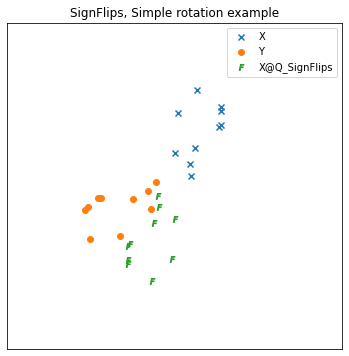

In [48]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SignFlips, Simple rotation example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y")
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", marker='$F$')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

Here we can see, SignFlips simply filped X along x-axis and y-axis to get X@Q_SignFlips to the third quadrant, where Y is. There is no further algning for this class.

## OrthogonalProcrustes

OrthogonalProcrustes helps a dataset X, to align with another dataset Y. It can be applied to two datasets that have same number of entries and some correspondence between the entries. It has similar function as scipy.linal.orthogonal_procrustes().

Use OrthogonalProcrustes to get the transformed dataset, X_prime_Orthogonal.

In [49]:
from graspologic.align import OrthogonalProcrustes
X_prime_Orthogonal = OrthogonalProcrustes().fit_transform(X, Y)

Name the rotated dataset to be X@Q_OrthogonalProcrustes. Plot X, Y, X@Q_OrthogonalProcrustes

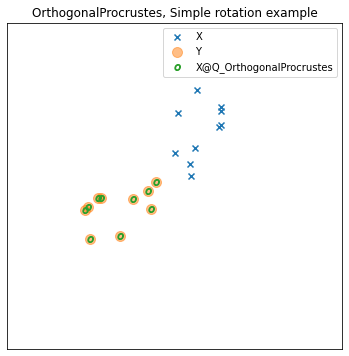

In [50]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("OrthogonalProcrustes, Simple rotation example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", s=100, alpha=0.5)
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", marker='$O$')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

## SeedlessProcrustes
SeedlessProcrustes aligns two datasets via an iterative algorithm that alternates optimal transport and regular procrustes.
It will not be restricted by the shape diferences between datasets, i.e. it can be apply to two datasets with/without the same number of entries. Here we use it for aligning the two same datasets X,Y showed above.

Introduce SeedlessProcrustes to get the transformed dataset, X_prime_Seedless.

In [51]:
from graspologic.align import SeedlessProcrustes

X_prime_Seedless = SeedlessProcrustes().fit_transform(X, Y)

Name the rotated dataset to be X@Q_SeedlessProcrustes. Plot X, Y, X@Q_SeedlessProcrustes

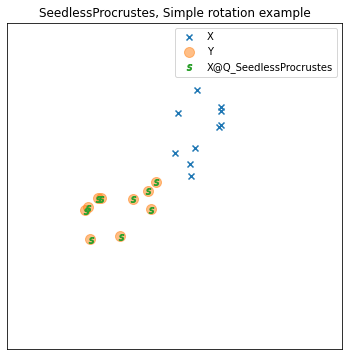

In [52]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes, Simple rotation example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", s=100, alpha=0.5)
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", marker='$S$')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

## Comparison between SignFlips, OrthogonalProcrustes, SeedlessProcrustes

Plot the outcomes together.

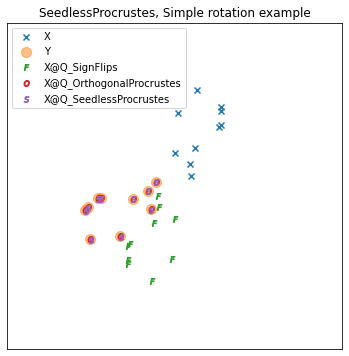

In [53]:
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes, Simple rotation example")
sns.color_palette("deep")
plt.scatter(X[:,0], X[:,1], label="X", marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", s=100, alpha=0.5)
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", marker='$F$')
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", marker='$o$')
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", marker='$S$')
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

Introduce np.linlg.norm to calculate the Frobenius norm of (X_prime - Y), for quantificaion of the aligning ability in this example.

In [55]:
norm_SignFlips = np.linalg.norm(X_prime_SignFlips - Y)
norm_Orthogonal = np.linalg.norm(X_prime_Orthogonal - Y)
norm_Seedless = np.linalg.norm(X_prime_Seedless - Y)
print('norm_SignFlips=', norm_SignFlips)
print('norm_Orthogonal=', norm_Orthogonal)
print('norm_Seedless=', norm_Seedless)

norm_SignFlips= 1.4779981074320632
norm_Orthogonal= 3.437379846455101e-16
norm_Seedless= 0.02152739003460826


SignFlips only do the simple flips of datasets along axises. Both OrthogonalProcrustes and SeedlessProcrustes align X very well with the exact palce and distribution of Y. 